In [1]:
import xarray as xr
import os

proj_dir = os.path.join(os.pardir,os.pardir)
data_dir = os.path.join(proj_dir,'data')

In [2]:
from dask.distributed import Client
C = Client()
C

Client Scheduler: tcp://127.0.0.1:33784 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 16 Cores: 16 Memory: 101.38 GB


In [3]:
grd_path = os.path.join(data_dir,'analysis','interim','grd2_dV.nc')
grd = xr.open_dataset(grd_path)

<IPython.core.display.Javascript object>


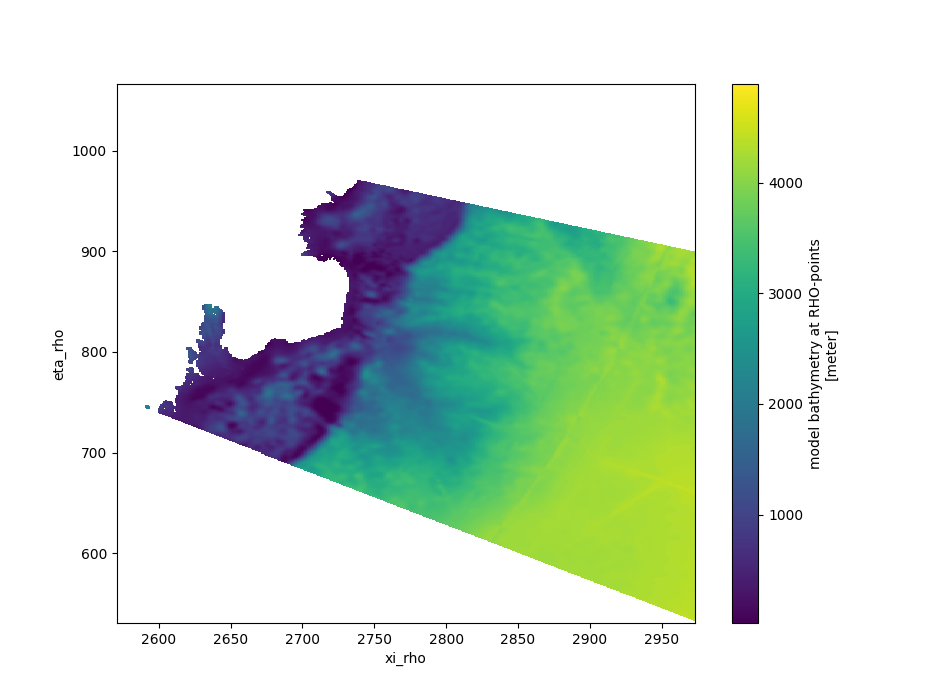

In [10]:
%matplotlib notebook
mask = (grd.lon_rho>107) & (grd.lon_rho<119) & (grd.lat_rho>-67.7)
grd.h.where(grd.mask_rho).where(mask).plot(size=7)

In [4]:
#4km:
coords_amery = {'xi_rho':slice(1167,1312),'eta_rho':slice(825,885)}

#2km:
# Amundsen
coords_amundsen = {'xi_rho':slice(520,760),'eta_rho':slice(950,1220),
          'xi_u': slice(520,759), 'eta_u': slice(950,1220),
          'xi_v': slice(520,760) , 'eta_v': slice(950,1219),
          'xi_psi': slice(520,759), 'eta_psi': slice(950,1219)}

coords_drygalski = {'xi_rho':slice(1500,1770),'eta_rho':slice(400,660),
          'xi_u':slice(1500,1769),'eta_u':slice(400,660),
          'xi_v':slice(1500,1770),'eta_v':slice(400,659),
          'xi_psi':slice(1500,1769),'eta_psi':slice(400,659)}

coords_filchner_ronne = {'xi_rho':slice(727,1256),'eta_rho':slice(1404,1883)}

coords_vanderford_totten = {'xi_rho':slice(2575,2816),'eta_rho':slice(682,978)}

In [5]:
def make_uvpsi_coors(coords):
    coords['xi_u']=slice(coords['xi_rho'].start,coords['xi_rho'].stop-1)
    coords['eta_u']=coords['eta_rho']
    coords['xi_v']=coords['xi_rho']
    coords['eta_v']=slice(coords['eta_rho'].start,coords['eta_rho'].stop-1)
    coords['xi_psi']=slice(coords['xi_rho'].start,coords['xi_rho'].stop-1)
    coords['eta_psi']=slice(coords['eta_rho'].start,coords['eta_rho'].stop-1)
    
    return coords

def subset(coords,name):
    
    coords = make_uvpsi_coors(coords)
    
    ds = xr.Dataset()

    for var,gt in [['m','rho'],['temp','rho'],['salt','rho']]:#,['zeta','rho'],['ubar','u'],['vbar','v'],
                   #,['u','u'],['v','v']]:
        print(f'processing {var}')
        path = os.path.join(data_dir,'analysis','raw','waom2','ocean_avg_0538-0610_'+var+'_ymonmean.nc')
        da = xr.open_dataset(path)[var]
        da = da.isel({'xi_'+gt : coords['xi_'+gt], 'eta_'+gt : coords['eta_'+gt]})
        ds[var] = da

    print('processing grid')    
    grd_path = os.path.join(data_dir,'analysis','interim','grd2_dV.nc')
    grd = xr.open_dataset(grd_path).isel(coords)
    ds = ds.merge(grd)
    
    #out_path = os.path.join(data_dir,'analysis','processed',f'atom2_{name}.nc')
    out_path = os.path.join('~/gadi/scratch/public/oxr581/lawrence',f'ocean_avg_0538-0610_{name}_monmean.nc')
    print(f'writing to {out_path}')
    ds.to_netcdf(out_path)
    
def subset_4km(coords,name):
    
    coords = make_uvpsi_coors(coords)
    
    ds = xr.Dataset()

    for var,gt in [['m','rho']]:#,['zeta','rho'],['ubar','u'],['vbar','v'],
                   #['temp','rho'],['salt','rho'],['u','u'],['v','v']]:
        print(f'processing {var}')
        path = os.path.join(data_dir,'analysis','raw','waom4_hr_nt','ocean_avg_0010.nc')
        da = xr.open_dataset(path)[var]
        da = da.isel({'xi_'+gt : coords['xi_'+gt], 'eta_'+gt : coords['eta_'+gt]})
        ds[var] = da

    print('processing grid')    
    grd_path = os.path.join(data_dir,'analysis','interim','grd4_dV.nc')
    grd = xr.open_dataset(grd_path).isel(coords)
    ds = ds.merge(grd)
    
    #out_path = os.path.join(data_dir,'analysis','processed',f'atom2_{name}.nc')
    out_path = os.path.join('~','gadi','g','data','gh9','waom_subsets',f'waom4_no_tides_hr_{name}.nc')
    print(f'writing to {out_path}')
    ds.to_netcdf(out_path)

In [6]:
subset(coords_vanderford_totten,'vanderford')
#subset_4km(coords_amery,'amery')

processing m
processing temp
processing salt
processing grid
writing to ~/gadi/scratch/public/oxr581/lawrence/ocean_avg_0538-0610_vanderford_monmean.nc
